In [7]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="password",
    database="TwitterDB",
    charset = 'utf8'
)

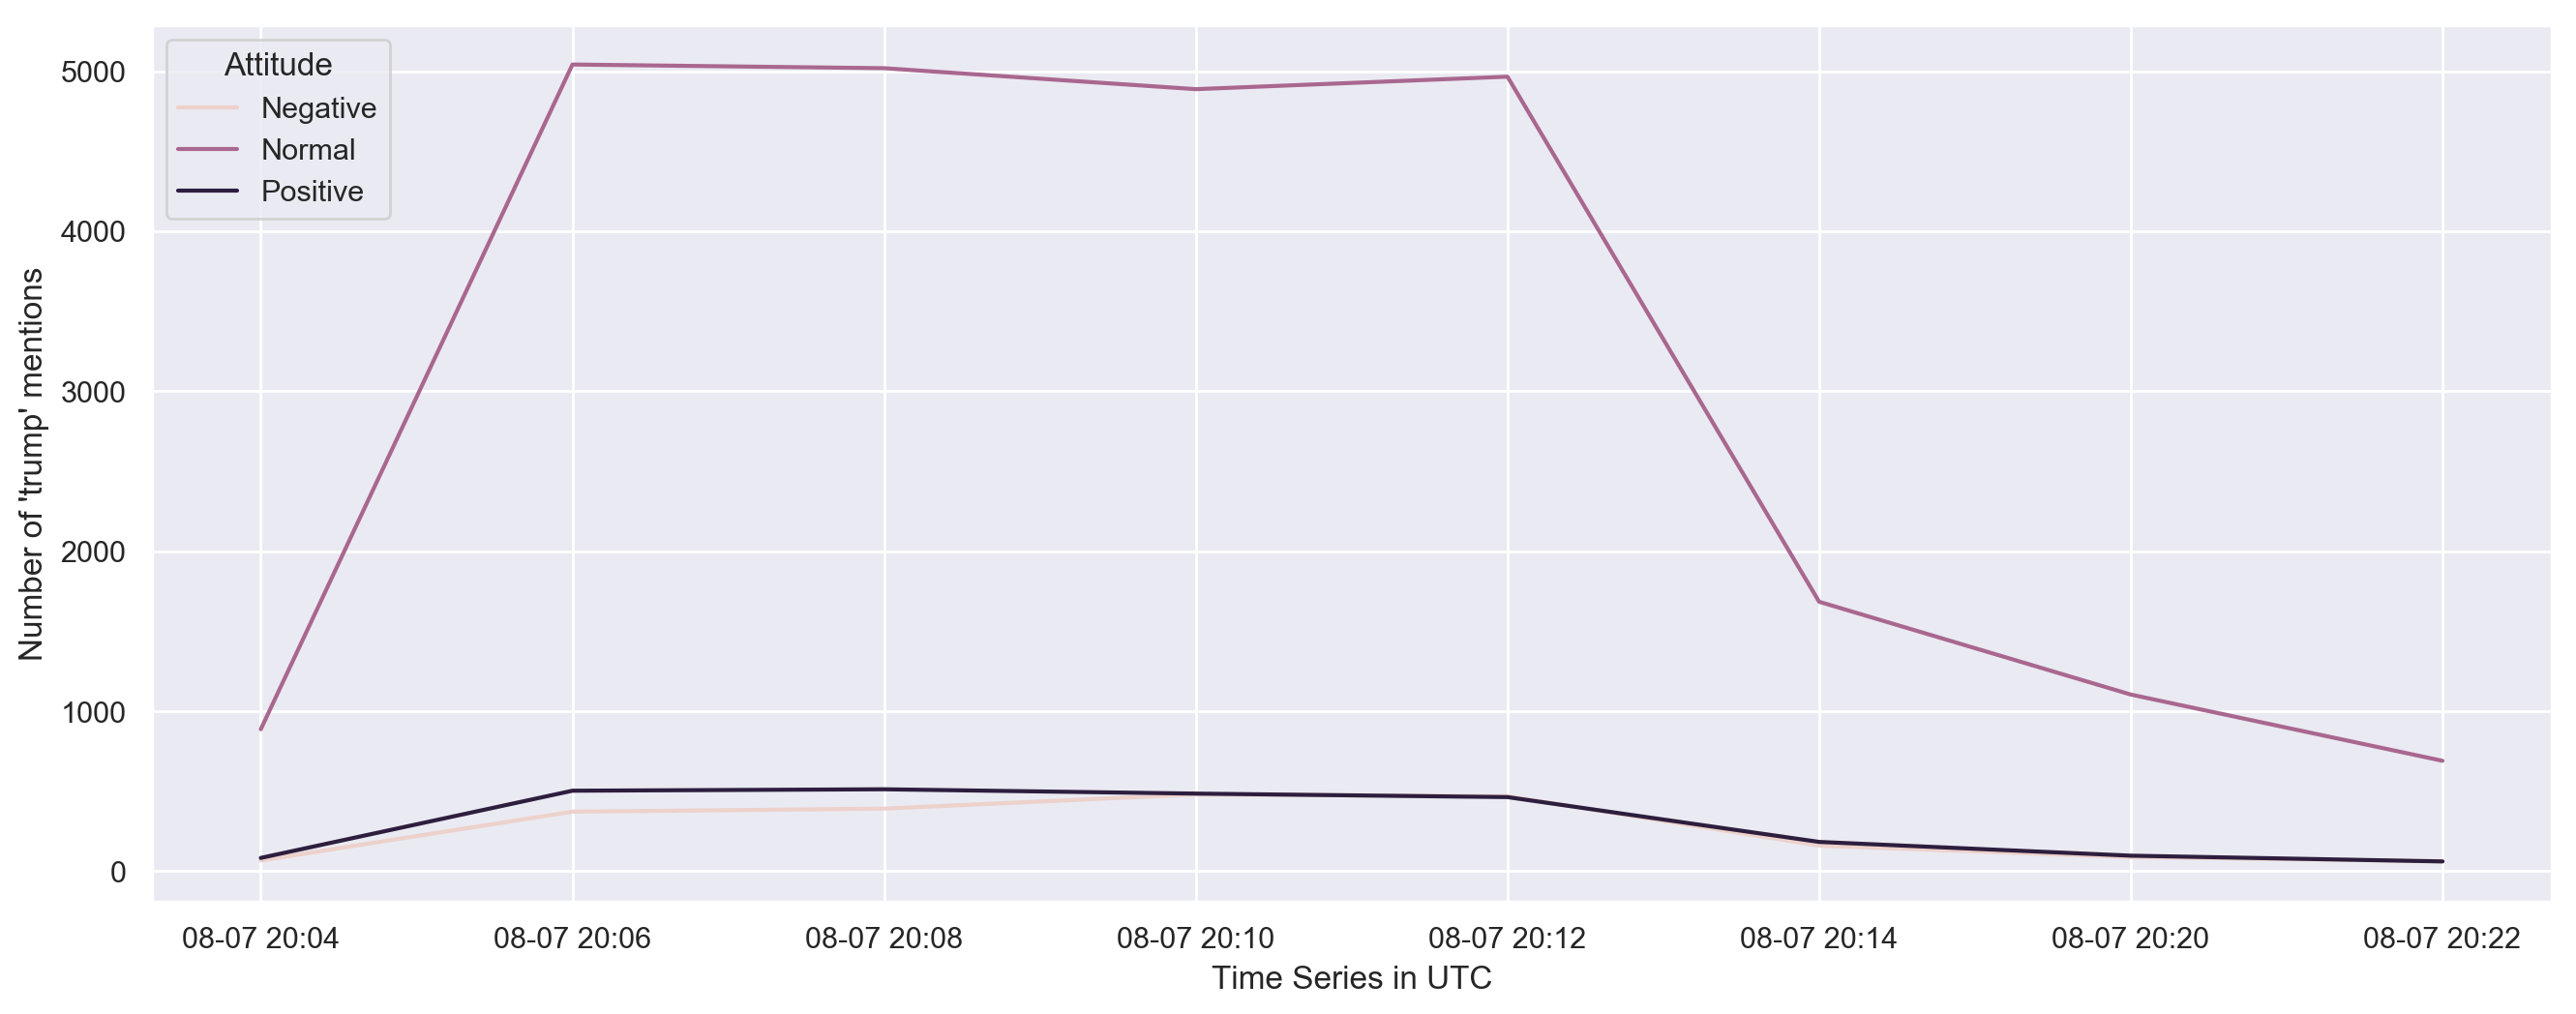

In [10]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])

# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='2min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))

sns.set(style="darkgrid")
# palette=sns.color_palette(["#FF5A5F","#484848", "#767676"])
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result)
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [12]:
# Using plotly.express
import plotly.express as px

fig = px.line(result, x='created_at', y='id_str', color='polarity')
fig.show()